*File created by Shrikrishna Jadhavar.*

 This analysis used data from the **cleaned_market_trend_analysis_dataset**.

# **Basic Info:**

In [89]:
# import Necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('/content/cleaned_market_trend_analysis_dataset')

df

,product_category,region,age_group,gender,month,sales_amount,units_sold,customer_rating
0,electronics,asia-pacific,55-64,male,may,189.17,42,2.8
1,home appliances,asia-pacific,45-54,non-binary,august,433.48,39,1.3
2,books,north america,55-64,female,january,96.38,2,1.6
3,sports equipment,north america,35-44,female,august,437.88,26,1.6
4,books,africa,35-44,male,december,241.96,16,2.5
...,...,...,...,...,...,...,...,...
9995,beauty products,latin america,55-64,female,january,85.20,41,1.6
9996,sports equipment,europe,35-44,female,march,585.17,86,1.2
9997,books,africa,65+,male,march,284.28,88,3.7
9998,sports equipment,north america,55-64,male,march,765.15,45,3.6


In [91]:
df.columns.tolist()

['product_category',
 'region',
 'age_group',
 'gender',
 'month',
 'sales_amount',
 'units_sold',
 'customer_rating']

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  10000 non-null  object 
 1   region            10000 non-null  object 
 2   age_group         10000 non-null  object 
 3   gender            10000 non-null  object 
 4   month             10000 non-null  object 
 5   sales_amount      10000 non-null  float64
 6   units_sold        10000 non-null  int64  
 7   customer_rating   10000 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [93]:
df.describe()

,sales_amount,units_sold,customer_rating
count,10000.000000,10000.000000,10000.000000
mean,501.453643,50.083700,3.031810
std,284.520903,28.790793,1.156294
min,10.040000,1.000000,1.000000
25%,252.215000,25.000000,2.000000
50%,499.895000,50.000000,3.000000
75%,743.237500,75.000000,4.000000
max,999.930000,100.000000,5.000000


In [94]:
df.describe(include = 'object')

,product_category,region,age_group,gender,month
count,10000,10000,10000,10000,10000
unique,6,6,6,3,12
top,home appliances,middle east,35-44,male,may
freq,1705,1729,1679,3375,863


In [95]:
df.isnull().sum()

,0
product_category,0
region,0
age_group,0
gender,0
month,0
sales_amount,0
units_sold,0
customer_rating,0


# **Market Research:**

In [96]:
# Geographical Patterns: Total sales and units sold by region.

geo_sales = df.groupby('region').agg(

    total_sales=('sales_amount', 'sum'),
    total_units=('units_sold', 'sum')).sort_values(by='total_sales', ascending=False)

geo_sales

,total_sales,total_units
region,,
middle east,865985.98,86763
north america,854546.99,83783
latin america,844422.83,84870
africa,836217.97,85524
europe,816688.34,82479
asia-pacific,796674.32,77418


**Top Regions by Sales:**

  *  Middle East: 865,985.98 (86,763 units sold)

  *  North America: 854,546.99 (83,783 units sold)

  * Latin America: 844,422.83 (84,870 units sold)

Asia-Pacific recorded the lowest sales among the regions.

In [97]:
# Demographic Trends: Sales by gender

gender_sales = df.groupby('gender')['sales_amount'].sum().sort_values(ascending=False)

gender_sales

,sales_amount
gender,
female,1685896.53
male,1672509.12
non-binary,1656130.78


Gender Sales:

 *   Female: 1,685,896.53 (highest contribution to sales)

In [98]:
# Sales by age group

age_group_sales = df.groupby('age_group')['sales_amount'].sum().sort_values(ascending=False)

age_group_sales

,sales_amount
age_group,
55-64,853716.97
45-54,834607.36
35-44,832907.14
18-24,832562.79
65+,831078.20
25-34,829663.97


In [99]:
age_gender_sales = df.groupby(['age_group', 'gender'])['sales_amount'].sum()

print(age_gender_sales)

age_group  gender    
18-24      female        262142.27
           male          278408.32
           non-binary    292012.20
25-34      female        274200.29
           male          265000.95
           non-binary    290462.73
35-44      female        271704.81
           male          292506.10
           non-binary    268696.23
45-54      female        285047.94
           male          281989.14
           non-binary    267570.28
55-64      female        296241.43
           male          279613.70
           non-binary    277861.84
65+        female        296559.79
           male          274990.91
           non-binary    259527.50
Name: sales_amount, dtype: float64


Age Group sales:

*  55–64 years old: 853,716.97 (highest sales)

*  25–34 years old: 829,663.97 (lowest sales)

In [100]:
# Top-selling product categories

product_sales = df.groupby('product_category')['sales_amount'].sum().sort_values(ascending=False)

product_sales

,sales_amount
product_category,
sports equipment,848927.95
clothing,848203.90
home appliances,847609.16
beauty products,838584.36
electronics,833212.00
books,797999.06


Top-Selling Categories by Revenue:

  *  Sports Equipment

  *  Clothing

  *  Home Appliances

In [101]:
product_units = df.groupby('product_category')['units_sold'].sum().sort_values(ascending=False)

product_units

,units_sold
product_category,
beauty products,85456
home appliances,84869
sports equipment,83700
electronics,83595
clothing,82639
books,80578


Top Categories by Units Sold:

  *  Beauty Products: 85,456 units
  *  Home Appliances: 84,869 units
  *  Sports Equipment: 83,700 units

In [102]:
# Seasonal Trends: Monthly sales patterns

monthly_sales = df.groupby('month')['sales_amount'].sum().sort_values(ascending=False)

monthly_sales

,sales_amount
month,
may,449770.95
april,439028.20
september,435196.64
january,431929.64
november,430255.49
december,423990.43
october,418942.95
august,415190.15
july,411438.51


Top Months by Sales:

 *   May
 *   April

Lowest Month:
 *  June

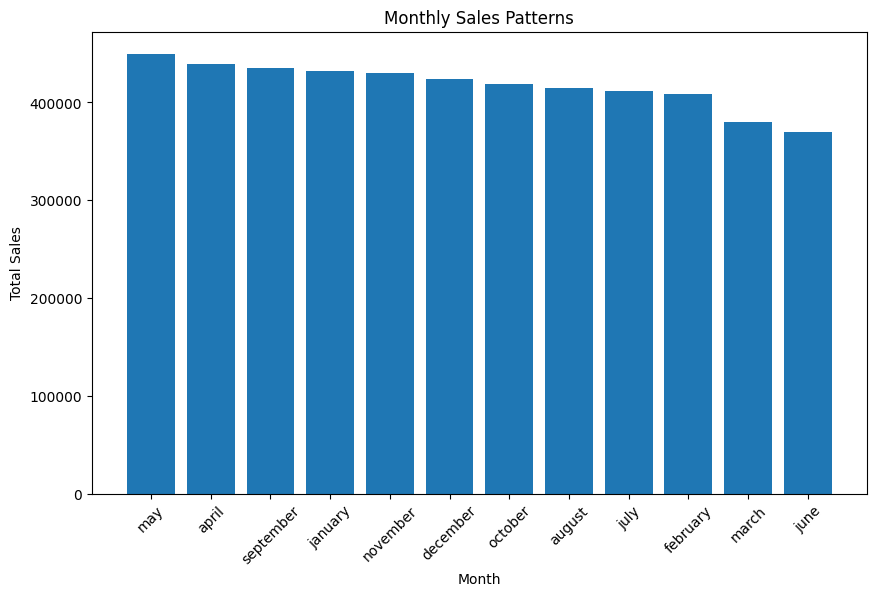

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Patterns')
plt.xticks(rotation=45)
plt.show()

In [104]:
import plotly.express as px

fig = px.choropleth(geo_sales,
                    locations=geo_sales.index,
                    color='total_sales',
                    hover_name=geo_sales.index,
                    title='Geographical Sales Patterns')

fig

# **Analysis:**

*Key Market Drivers and Constraints*

In [105]:
# Correlation between numeric variables (sales_amount, units_sold, customer_rating)

numeric_correlation = df[['sales_amount', 'units_sold', 'customer_rating']].corr()

numeric_correlation

,sales_amount,units_sold,customer_rating
sales_amount,1.000000,-0.012090,0.006085
units_sold,-0.012090,1.000000,0.013904
customer_rating,0.006085,0.013904,1.000000


In [106]:
# Sales and units sold by region, product_category)

region_sales_units = df.groupby('region')[['sales_amount', 'units_sold']].mean()

region_sales_units

,sales_amount,units_sold
region,,
africa,497.452689,50.876859
asia-pacific,508.407352,49.405233
europe,498.893305,50.384239
latin america,501.438735,50.397862
middle east,500.859445,50.181029
north america,502.084013,49.226204


In [107]:
# Sales and units sold by product_category.

category_sales_units = df.groupby('product_category')[['sales_amount', 'units_sold']].mean()

category_sales_units

,sales_amount,units_sold
product_category,,
beauty products,503.956947,51.355769
books,494.729733,49.955363
clothing,507.298983,49.425239
electronics,502.540410,50.419180
home appliances,497.131472,49.776540
sports equipment,502.919402,49.585308


In [108]:
from scipy.stats import pearsonr

# Correlation between customer rating and sales

rating_sales_corr, _ = pearsonr(df['customer_rating'], df['sales_amount'])

rating_sales_corr

0.006084685180691401

In [109]:
# Constraints: Identified low-performing region.

low_sales_regions = geo_sales[geo_sales['total_sales'] < geo_sales['total_sales'].mean()]

low_sales_regions

,total_sales,total_units
region,,
europe,816688.34,82479
asia-pacific,796674.32,77418


In [110]:
low_sales_categories = product_sales[product_sales < product_sales.mean()]

low_sales_categories

,sales_amount
product_category,
electronics,833212.00
books,797999.06


*Analyze trends and forecast*

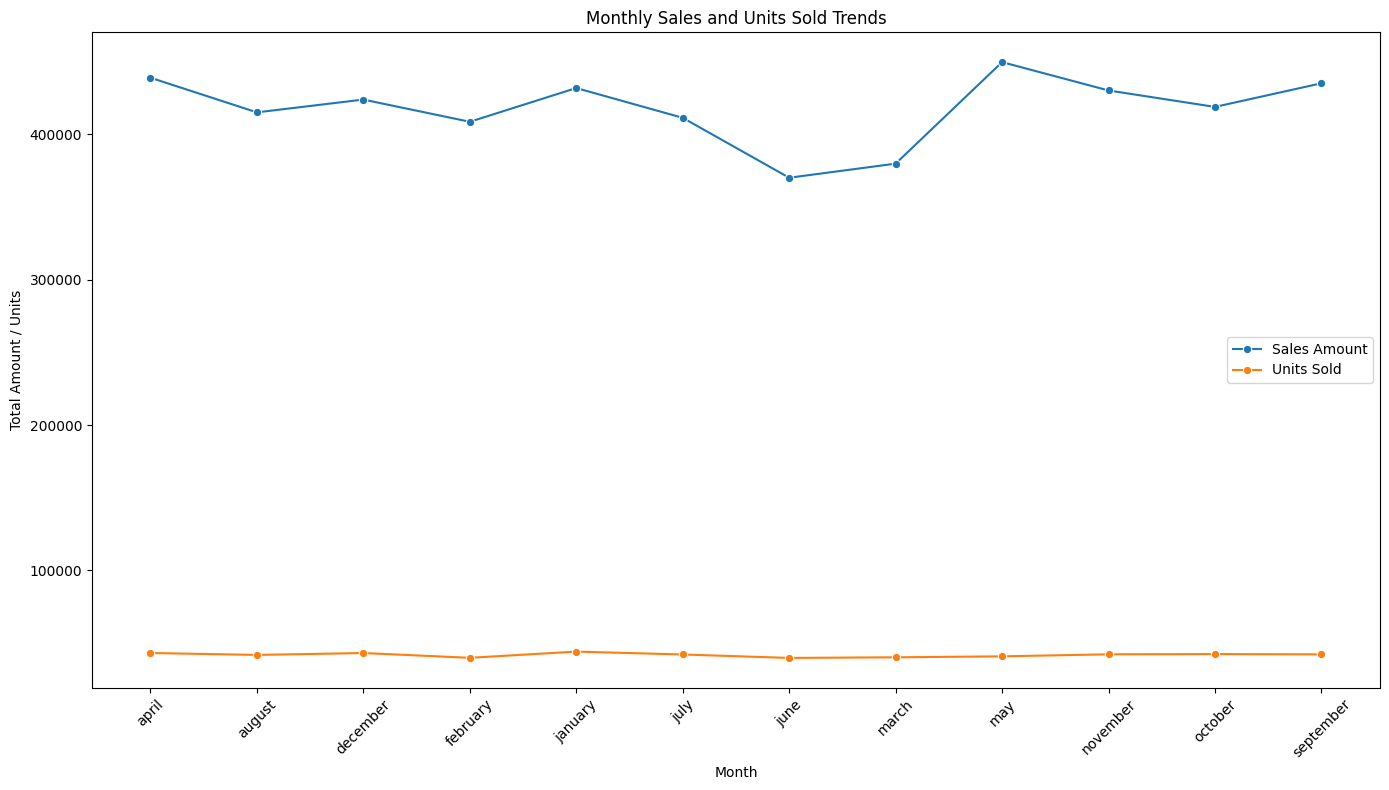

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly sales trends for forecasting
monthly_trends = df.groupby('month')[['sales_amount', 'units_sold']].sum().sort_index()

# Plotting sales trends to visualize seasonality
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends, x=monthly_trends.index, y="sales_amount", label="Sales Amount", marker="o")
sns.lineplot(data=monthly_trends, x=monthly_trends.index, y="units_sold", label="Units Sold", marker="o")
plt.title("Monthly Sales and Units Sold Trends")
plt.ylabel("Total Amount / Units")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [112]:
# Preparing data for forecasting (time series)
forecast_data = monthly_trends.reset_index()

forecast_data

,month,sales_amount,units_sold
0,april,439028.20,43061
1,august,415190.15,41747
2,december,423990.43,43045
3,february,408707.20,39756
4,january,431929.64,44032
5,july,411438.51,42035
6,june,370194.29,39686
7,march,379891.98,40101
8,may,449770.95,40763
9,november,430255.49,42160


*Segment the market based on identified trends*

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

In [114]:
# Prepared dataset for clustering: By Product Type.

# Grouping by product type and calculating average sales and units sold
product_clusters = df.groupby('product_category')[['sales_amount', 'units_sold']].mean()

# Scaling the data for clustering
scaled_product_clusters = scaler.fit_transform(product_clusters)

# Applying KMeans clustering
kmeans_product = KMeans(n_clusters=3, random_state=42).fit(scaled_product_clusters)

# Adding cluster labels to the original data
product_clusters['Cluster'] = kmeans_product.labels_

product_clusters

,sales_amount,units_sold,Cluster
product_category,,,
beauty products,503.956947,51.355769,2
books,494.729733,49.955363,1
clothing,507.298983,49.425239,0
electronics,502.540410,50.419180,1
home appliances,497.131472,49.776540,1
sports equipment,502.919402,49.585308,0


In [115]:
# Prepared dataset for clustering: By Region.

# Grouping by region and calculating average sales and units sold
region_clusters = df.groupby('region')[['sales_amount', 'units_sold']].mean()

scaled_region_clusters = scaler.fit_transform(region_clusters)

kmeans_region = KMeans(n_clusters=3, random_state=42).fit(scaled_region_clusters)

region_clusters['Cluster'] = kmeans_region.labels_

region_clusters

,sales_amount,units_sold,Cluster
region,,,
africa,497.452689,50.876859,2
asia-pacific,508.407352,49.405233,1
europe,498.893305,50.384239,0
latin america,501.438735,50.397862,0
middle east,500.859445,50.181029,0
north america,502.084013,49.226204,1


In [116]:
# Prepared dataset for clustering: By Consumer Group.

# Grouping by consumer demographics (age_group and gender)
consumer_clusters = df.groupby(['age_group', 'gender'])[['sales_amount', 'units_sold']].mean()

scaled_consumer_clusters = scaler.fit_transform(consumer_clusters)

kmeans_consumer = KMeans(n_clusters=3, random_state=42).fit(scaled_consumer_clusters)

consumer_clusters['Cluster'] = kmeans_consumer.labels_

consumer_clusters

sales_amount  units_sold  Cluster
age_group gender                                       
18-24     female        498.369335   50.629278        2
          male          501.636613   49.299099        0
          non-binary    508.732056   49.851916        0
25-34     female        508.720390   50.098330        0
          male          478.341065   50.400722        1
          non-binary    504.275573   50.100694        0
35-44     female        509.765122   48.962477        0
          male          509.592509   49.092334        0
          non-binary    469.748654   50.326923        1
45-54     female        515.457396   49.839060        0
          male          495.587241   52.173989        2
          non-binary    501.067940   51.544944        2
55-64     female        509.005893   50.252577        0
          male          504.717870   49.487365        0
          non-binary    518.398955   49.772388        0
65+       female        500.945591   50.268581        0
          male          483.288067   50.140598        1
          non-binary    510.880906   49.175197        0

In [117]:
# Group data by product type and region
segment_sales = df.groupby(['product_category', 'region'])['sales_amount'].sum().reset_index()

# Analyze sales patterns for each segment
print(segment_sales)

    product_category         region  sales_amount
0    beauty products         africa     132476.27
1    beauty products   asia-pacific     127506.17
2    beauty products         europe     142327.26
3    beauty products  latin america     148224.01
4    beauty products    middle east     145391.61
5    beauty products  north america     142659.04
6              books         africa     131215.42
7              books   asia-pacific     124381.00
8              books         europe     118493.16
9              books  latin america     145021.02
10             books    middle east     148081.82
11             books  north america     130806.64
12          clothing         africa     147472.96
13          clothing   asia-pacific     140709.27
14          clothing         europe     129967.56
15          clothing  latin america     137883.69
16          clothing    middle east     145487.84
17          clothing  north america     146682.58
18       electronics         africa     129762.46


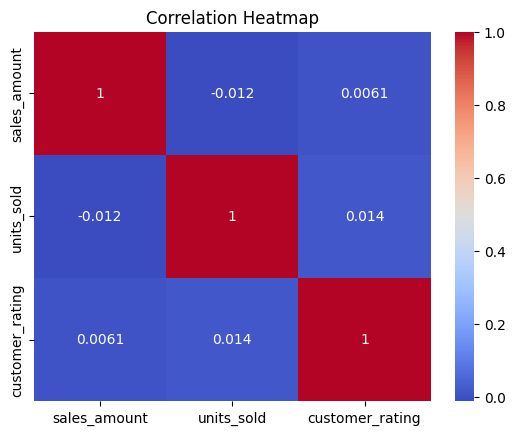

In [118]:
import seaborn as sns

sns.heatmap(numeric_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

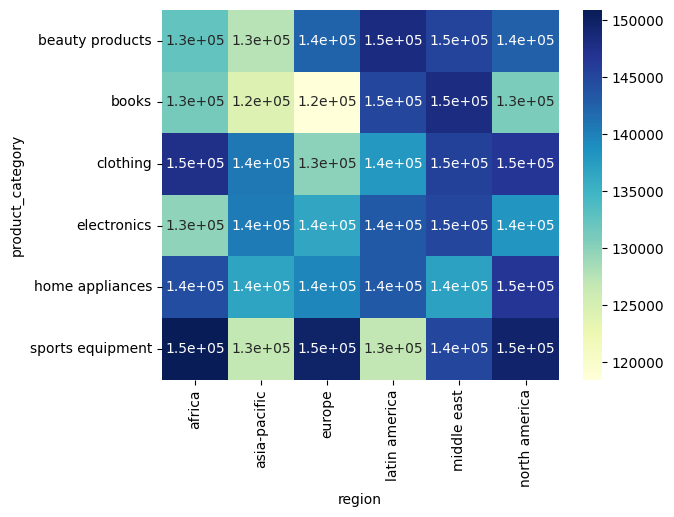

In [119]:
# Visualize sales distribution using a heatmap

import seaborn as sns
sns.heatmap(segment_sales.pivot(index='product_category', columns='region', values='sales_amount'), annot=True, cmap='YlGnBu')
plt.show()